In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from pmdarima.arima import auto_arima

In [3]:
data = pd.read_csv('Data/monthly_weather_summary.csv')
data.head(10)

,year,month,latitude,longitude,tp,sf,u10,t2m,tcc
0,2018,12,-10.0,30.00,0.000054,0.0,-1.398939,298.0023,0.545591
1,2018,12,-10.0,30.25,0.000008,0.0,-1.398939,298.0023,0.545591
2,2018,12,-10.0,30.50,0.000016,0.0,-1.398939,298.0023,0.545591
3,2018,12,-10.0,30.75,0.000026,0.0,-1.398939,298.0023,0.545591
4,2018,12,-10.0,31.00,0.000034,0.0,-1.398939,298.0023,0.545591
5,2018,12,-10.0,31.25,0.000025,0.0,-1.398939,298.0023,0.545591
6,2018,12,-10.0,31.50,0.000026,0.0,-1.398939,298.0023,0.545591
7,2018,12,-10.0,31.75,0.000017,0.0,-1.398939,298.0023,0.545591
8,2018,12,-10.0,32.00,0.000016,0.0,-1.398939,298.0023,0.545591
9,2018,12,-10.0,32.25,0.000004,0.0,-1.398939,298.0023,0.545591


In [4]:
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

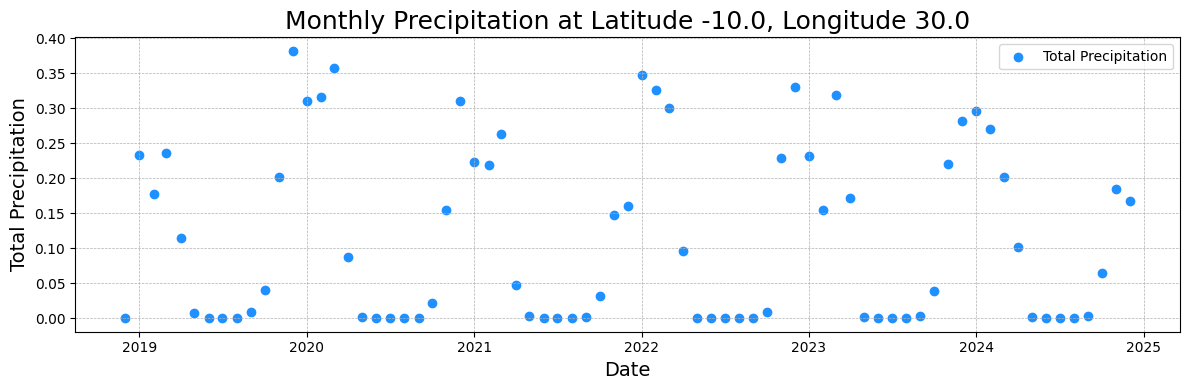

In [5]:
# Filter data for specific latitude and longitude
latitude_value = -10.0  # Replace with the desired latitude
longitude_value = 30.00  # Replace with the desired longitude
filtered_data = data[(data['latitude'] == latitude_value) & (data['longitude'] == longitude_value)]

# Create the Sales Data Plot

# Set up the plot style and size
plt.figure(figsize=(12, 4))

# Plot the Sales Data Scatter Plot
plt.scatter(filtered_data['date'], filtered_data['tp'], color='dodgerblue')

# Set the title and labels
plt.title(f'Monthly Precipitation at Latitude {latitude_value}, Longitude {longitude_value}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Precipitation', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['Total Precipitation'])

# Adjust layout and display plots
plt.tight_layout()
plt.show()

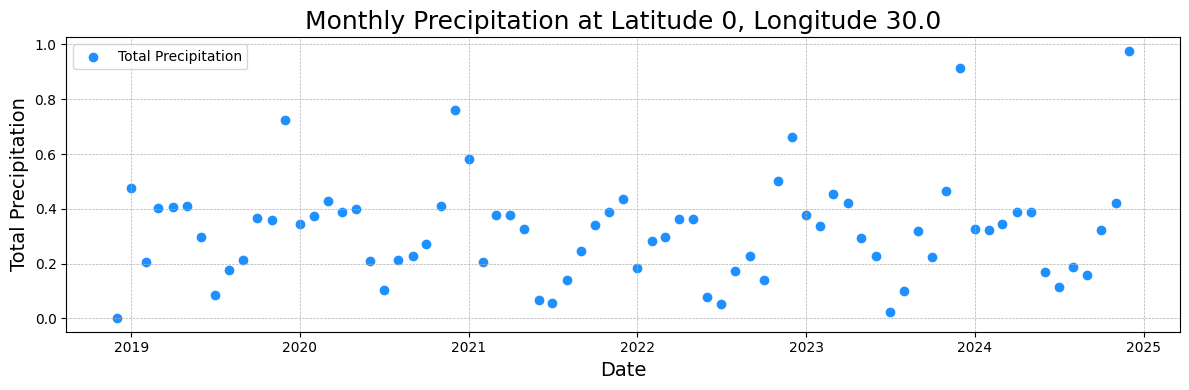

In [6]:
# Filter data for specific latitude and longitude
latitude_value = 0  # Replace with the desired latitude
longitude_value = 30.00  # Replace with the desired longitude
filtered_data = data[(data['latitude'] == latitude_value) & (data['longitude'] == longitude_value)]

# Set up the plot style and size
plt.figure(figsize=(12, 4))

# Plot the Sales Data Scatter Plot
plt.scatter(filtered_data['date'], filtered_data['tp'], color='dodgerblue')

# Set the title and labels
plt.title(f'Monthly Precipitation at Latitude {latitude_value}, Longitude {longitude_value}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Precipitation', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['Total Precipitation'])

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [7]:
# Split the data into train and test sets
train_data = data[data['date'] < '2024-01-01']
test_data = data[data['date'] >= '2024-01-01']

# Display the sizes of the train and test sets
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 202581
Test set size: 39852


In [8]:
# Filter data for latitude -10 and longitude 30
sample_data = data[(data['latitude'] == -10) & (data['longitude'] == 30)]

# Split the sample data into train and test sets
sample_train_data = sample_data[sample_data['date'] < '2024-01-01']
sample_test_data = sample_data[sample_data['date'] >= '2024-01-01']

# Display the sizes of the new train and test sets
print(f"Sample training set size: {len(sample_train_data)}")
print(f"Sample test set size: {len(sample_test_data)}")

# Group the training data by latitude and longitude and aggregate the 'tp' values into a time series for each location
# percip_series = train_data.groupby(['latitude', 'longitude'])['tp'].apply(list)

# Filter out series that are too short or contain only NaN values
# filtered_percip_series = {
#     (lat, lon): series for (lat, lon), series in percip_series.items()
#     if len(series) > 12 and not all(np.isnan(series))  # Ensure at least 12 data points and not all NaN
# }

# # Impute missing values in each series (e.g., using forward fill or mean imputation)
# for key, series in filtered_percip_series.items():
#     filtered_percip_series[key] = pd.Series(series).fillna(method='ffill').fillna(method='bfill').tolist()


Sample training set size: 61
Sample test set size: 12


In [9]:
sample_percip_series = sample_train_data['tp']

# Fit the auto_arima model (use 12 for m since we have monthly data and a yearly trend)
arima_model = auto_arima(sample_percip_series, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-135.263, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-73.206, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-132.198, Time=0.35 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-38.475, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-129.399, Time=0.27 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-134.586, Time=0.87 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-134.117, Time=0.09 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-128.860, Time=0.70 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=-138.100, Time=0.58 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=inf

In [10]:
# Print summary of the model
print(arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   61
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  76.079
Date:                            Mon, 28 Apr 2025   AIC                           -142.159
Time:                                    15:09:58   BIC                           -131.605
Sample:                                         0   HQIC                          -138.023
                                             - 61                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.005      0.158      0.874      -0.009       0.011
ma.L1          0.6206      0.071   

In [11]:
# Extract the parameters
p, d, q = arima_model.order
P, D, Q, s = arima_model.seasonal_order

print(f"The ARIMA parameters are p = {p}, d = {d}, q = {q}")
print(f"The seasonal ARIMA parameters are P = {P}, D = {D}, Q = {Q}")

The ARIMA parameters are p = 0, d = 0, q = 1
The seasonal ARIMA parameters are P = 1, D = 0, Q = 1


In [12]:
# Find the Training Set MAPE
predicted_values = arima_model.predict_in_sample()
actual_values = sample_percip_series.values

# Calculate the Mean Absolute Percentage Error (MAPE) for training and testing data
def calculate_mape(y_true, y_pred):
    # Avoid division by zero by replacing zeros in y_true with a small value (e.g., epsilon)
    epsilon = 1e-10
    y_true = np.where(y_true == 0, epsilon, y_true)
    return (100 * abs((y_true - y_pred) / y_true)).mean()

mape_arima = calculate_mape(actual_values, predicted_values)
print(f"The training set MAPE is: {mape_arima:.2f}%")

The training set MAPE is: 1011621625.47%


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


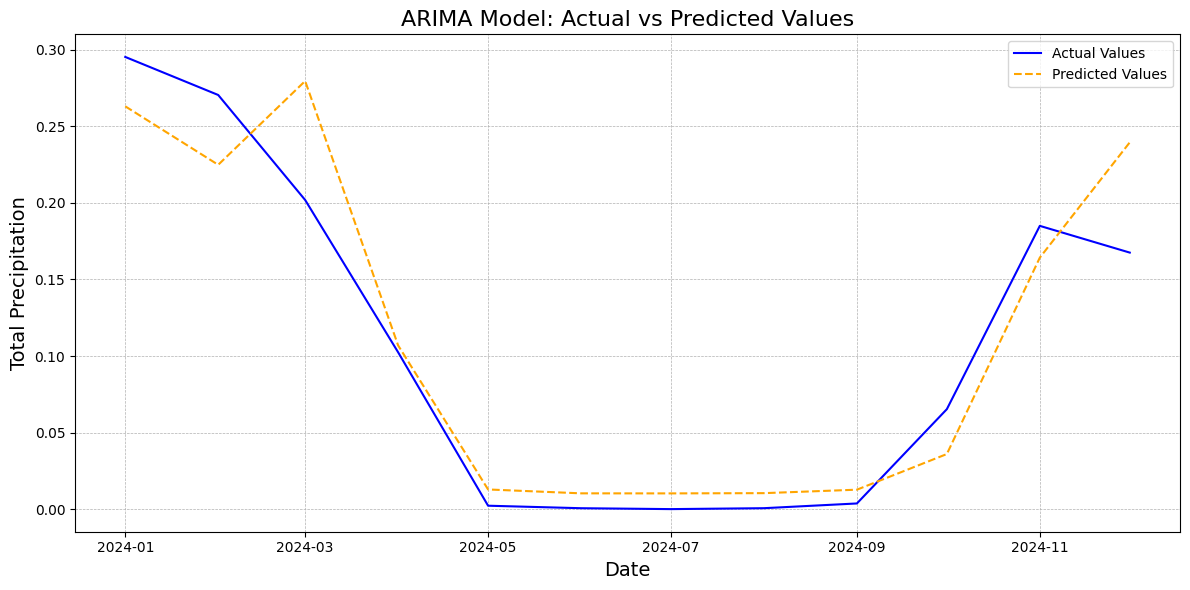

In [13]:
# Predict values for the test data
test_predicted_values = arima_model.predict(n_periods=len(sample_test_data))

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(sample_test_data['date'], sample_test_data['tp'], label='Actual Values', color='blue')
plt.plot(sample_test_data['date'], test_predicted_values, label='Predicted Values', color='orange', linestyle='--')

# Add title and labels
plt.title('ARIMA Model: Actual vs Predicted Values', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Precipitation', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Calculate the MAPE for the test data
test_actual_values = sample_test_data['tp'].values
test_mape_arima = calculate_mape(test_actual_values, test_predicted_values)

print(f"The test set MAPE is: {test_mape_arima:.2f}%")

The test set MAPE is: 855666754.41%


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate MAE
mae_train = mean_absolute_error(actual_values, predicted_values)

print(f"Training RMSE: {rmse_train:.6f}")
print(f"Training MAE: {mae_train:.6f}")


Training RMSE: 0.074882
Training MAE: 0.052226


In [16]:
unique_coordinates = data[['latitude', 'longitude']].drop_duplicates().values.tolist()
total_unique_coordinates = len(unique_coordinates)
print(f"Unique Coordinates: {unique_coordinates}")
print(f"Total Count of Unique Coordinates: {total_unique_coordinates}")

Unique Coordinates: [[-10.0, 30.0], [-10.0, 30.25], [-10.0, 30.5], [-10.0, 30.75], [-10.0, 31.0], [-10.0, 31.25], [-10.0, 31.5], [-10.0, 31.75], [-10.0, 32.0], [-10.0, 32.25], [-10.0, 32.5], [-10.0, 32.75], [-10.0, 33.0], [-10.0, 33.25], [-10.0, 33.5], [-10.0, 33.75], [-10.0, 34.0], [-10.0, 34.25], [-10.0, 34.5], [-10.0, 34.75], [-10.0, 35.0], [-10.0, 35.25], [-10.0, 35.5], [-10.0, 35.75], [-10.0, 36.0], [-10.0, 36.25], [-10.0, 36.5], [-10.0, 36.75], [-10.0, 37.0], [-10.0, 37.25], [-10.0, 37.5], [-10.0, 37.75], [-10.0, 38.0], [-10.0, 38.25], [-10.0, 38.5], [-10.0, 38.75], [-10.0, 39.0], [-10.0, 39.25], [-10.0, 39.5], [-10.0, 39.75], [-10.0, 40.0], [-9.75, 30.0], [-9.75, 30.25], [-9.75, 30.5], [-9.75, 30.75], [-9.75, 31.0], [-9.75, 31.25], [-9.75, 31.5], [-9.75, 31.75], [-9.75, 32.0], [-9.75, 32.25], [-9.75, 32.5], [-9.75, 32.75], [-9.75, 33.0], [-9.75, 33.25], [-9.75, 33.5], [-9.75, 33.75], [-9.75, 34.0], [-9.75, 34.25], [-9.75, 34.5], [-9.75, 34.75], [-9.75, 35.0], [-9.75, 35.25], [-9

In [17]:
# Find coordinates with non-zero values in the 'tp' column
non_zero_coordinates = data.groupby(['latitude', 'longitude'])['tp'].sum().reset_index()
non_zero_coordinates = non_zero_coordinates[non_zero_coordinates['tp'] > 0][['latitude', 'longitude']]

print(f"Coordinates with non-zero values:\n{non_zero_coordinates}")

Coordinates with non-zero values:
      latitude  longitude
0        -10.0      30.00
1        -10.0      30.25
2        -10.0      30.50
3        -10.0      30.75
4        -10.0      31.00
...        ...        ...
3316      10.0      39.00
3317      10.0      39.25
3318      10.0      39.50
3319      10.0      39.75
3320      10.0      40.00

[3321 rows x 2 columns]


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


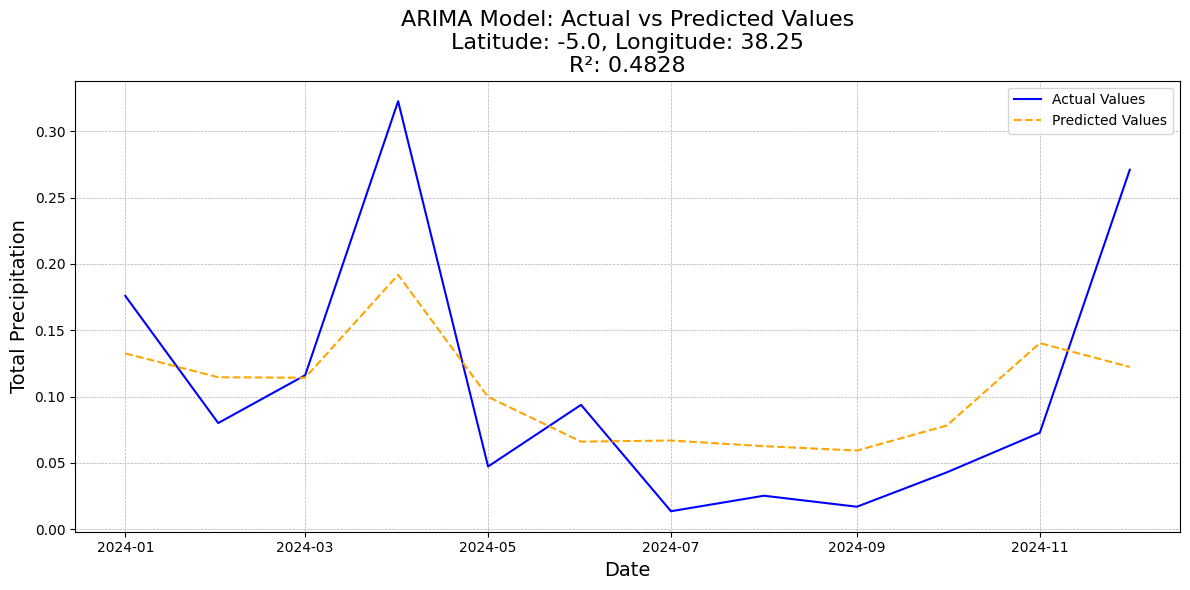

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


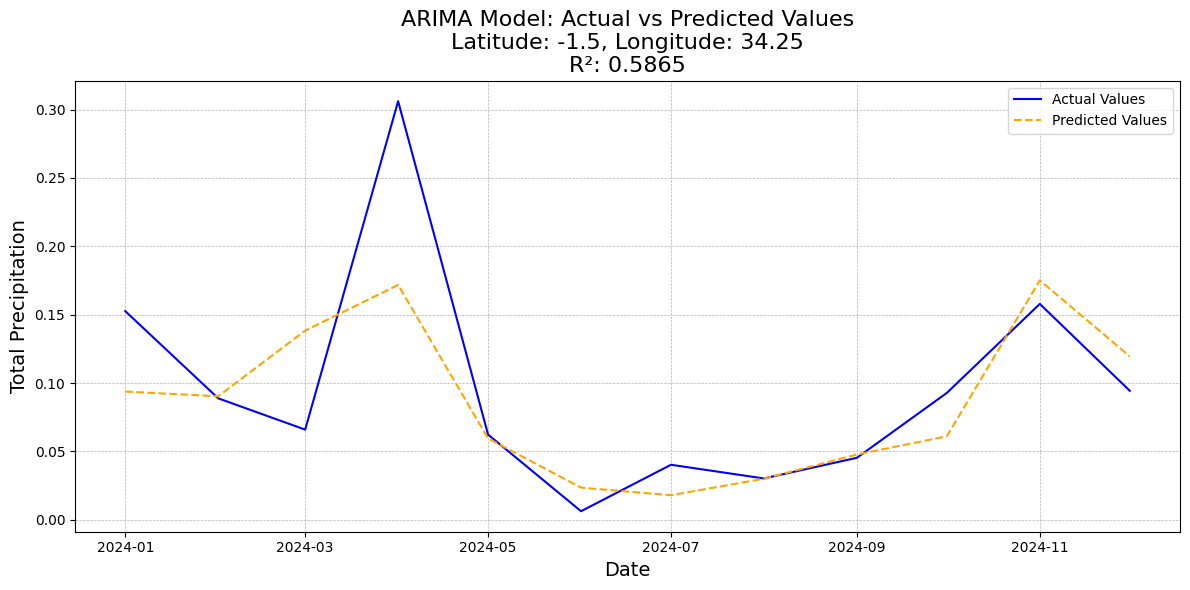

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Skipping coordinate (6.0, 30.0) due to low R² value: 0.2375


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


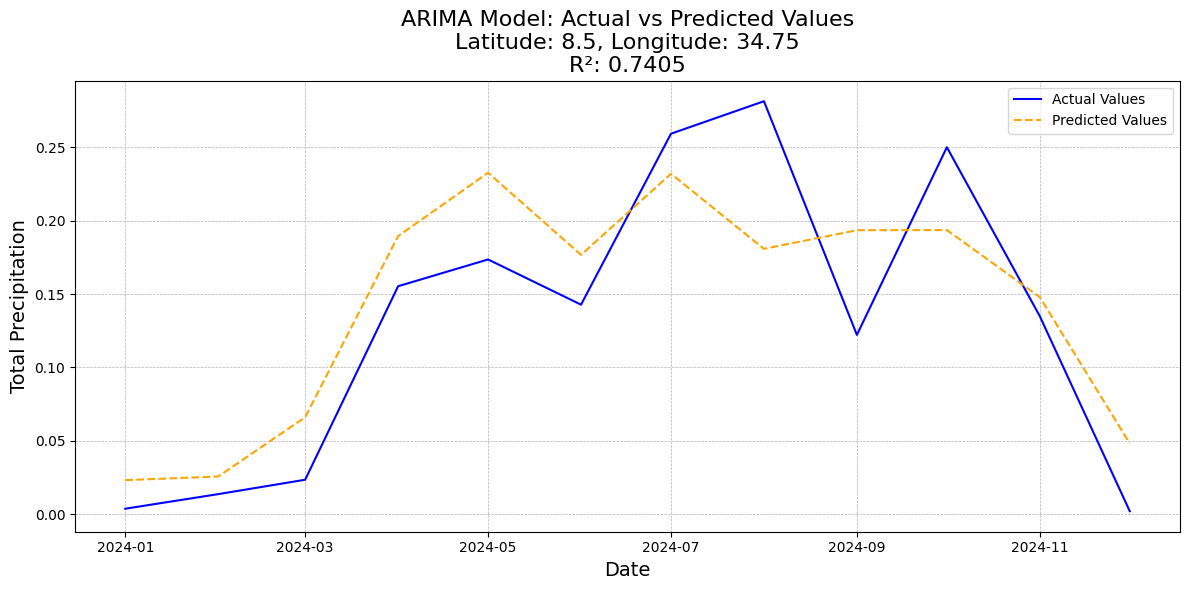

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


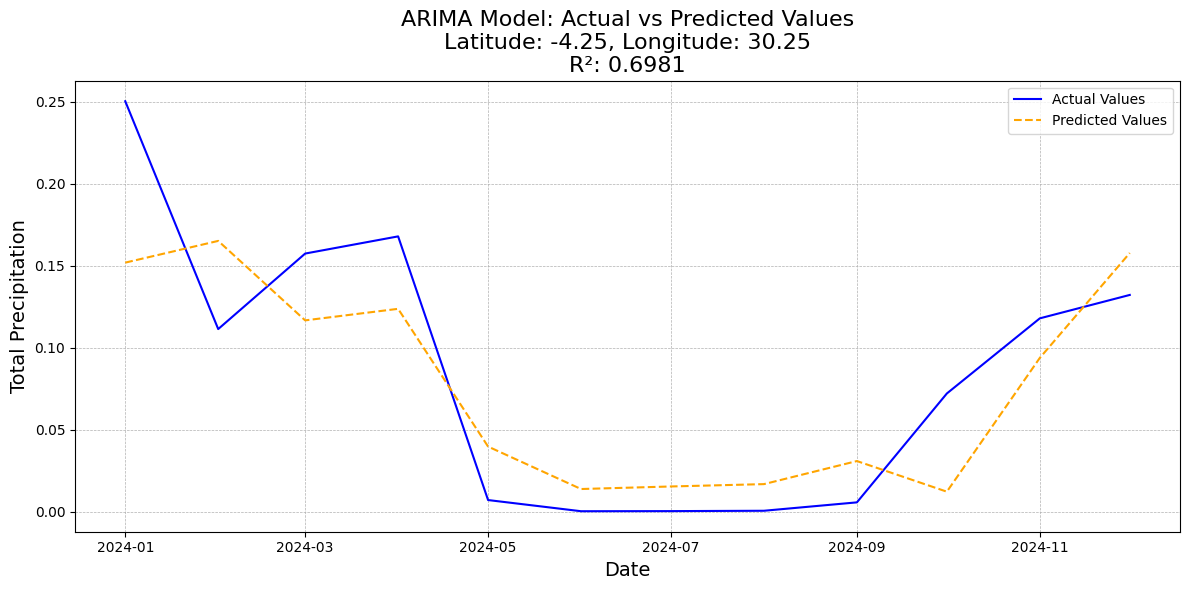

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


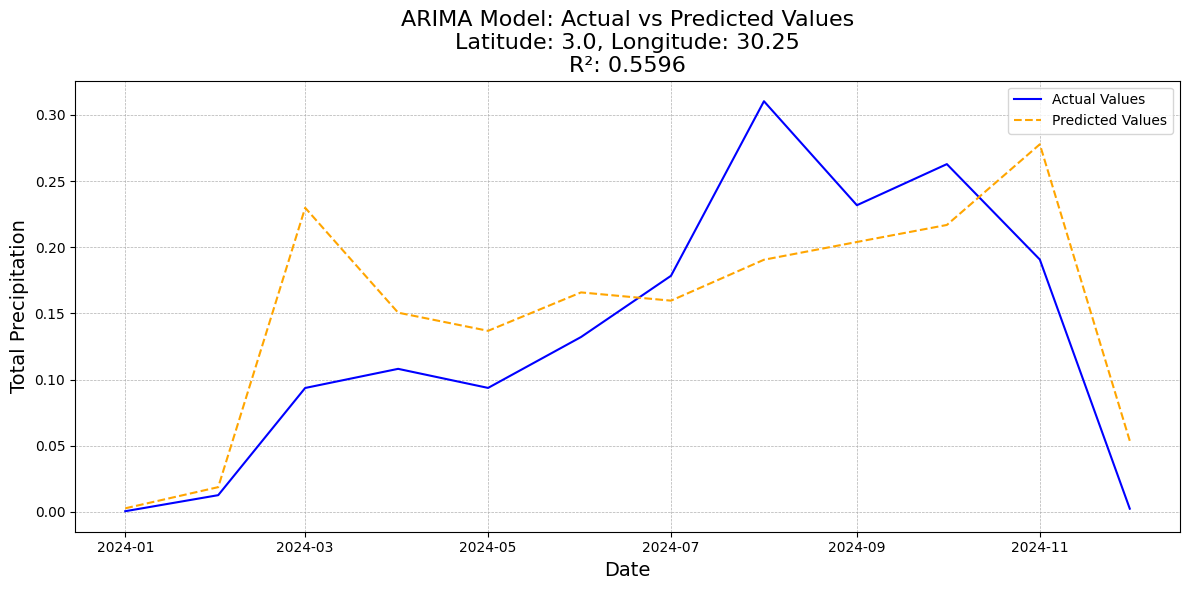

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


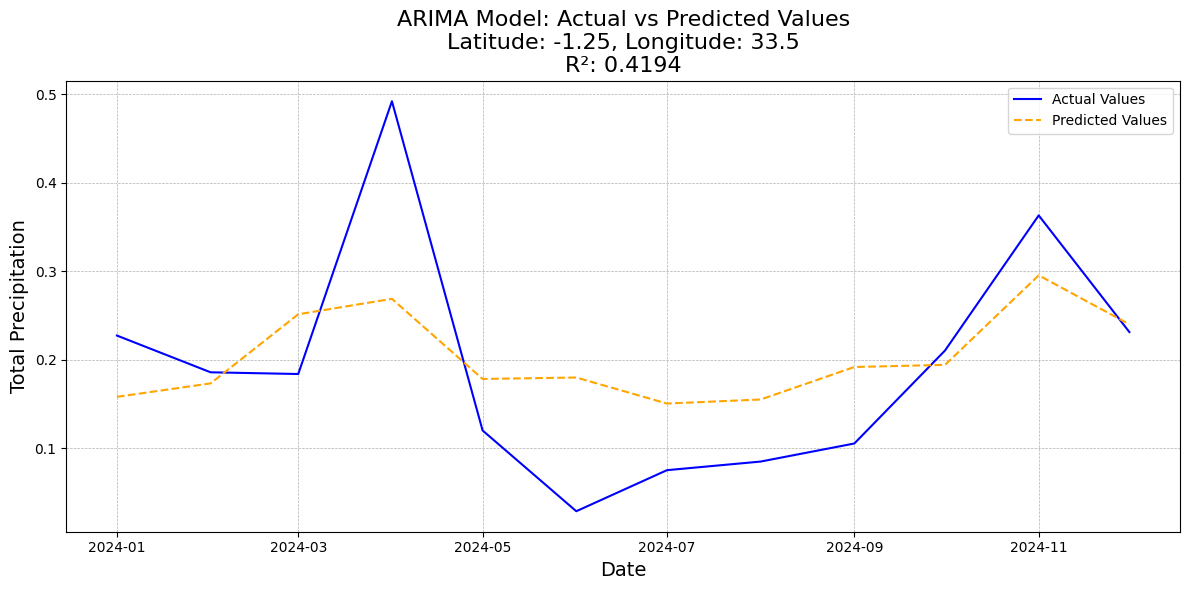

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


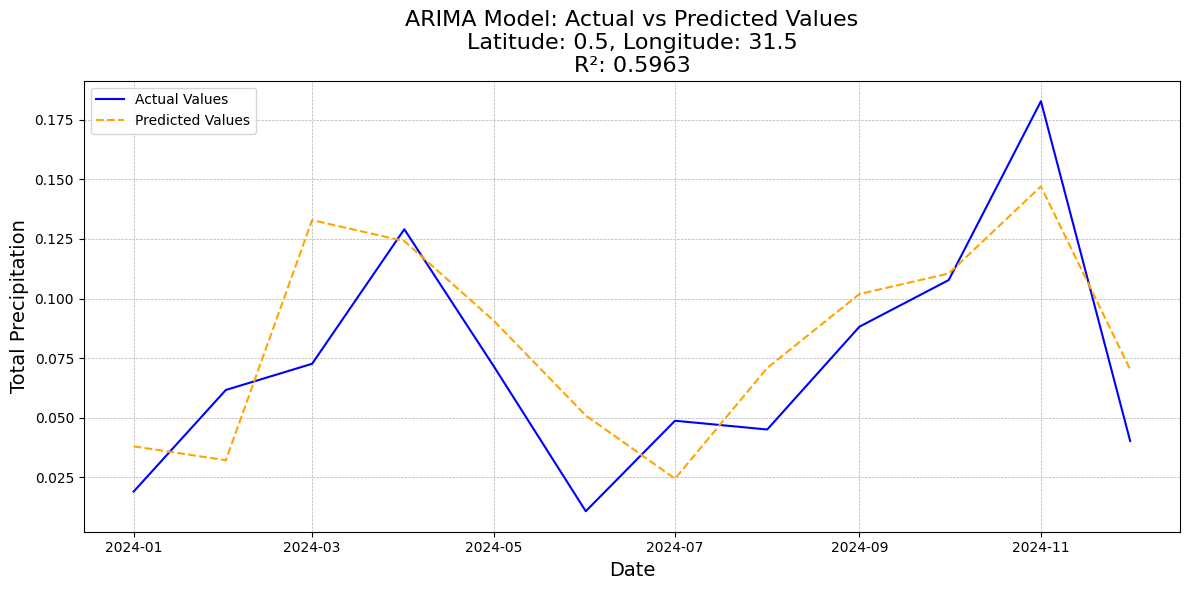

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Skipping coordinate (0.0, 34.5) due to low R² value: 0.1217


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


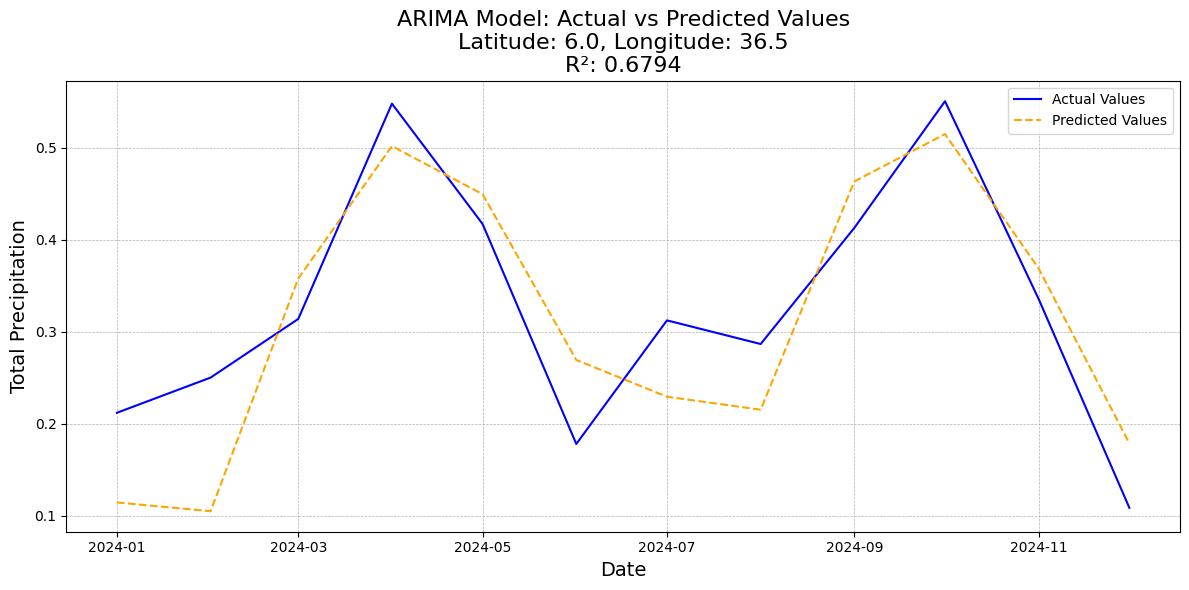

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


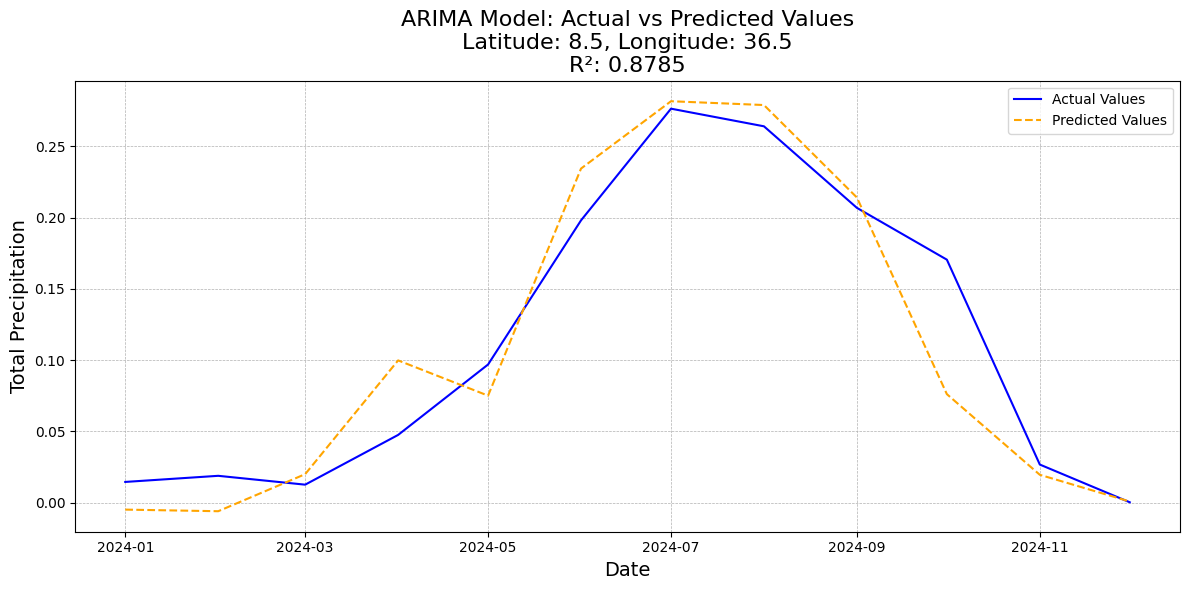

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Skipping coordinate (-4.75, 37.25) due to low R² value: 0.0234


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Skipping coordinate (6.25, 30.5) due to low R² value: -0.0060


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Skipping coordinate (-3.0, 39.75) due to low R² value: 0.1568


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


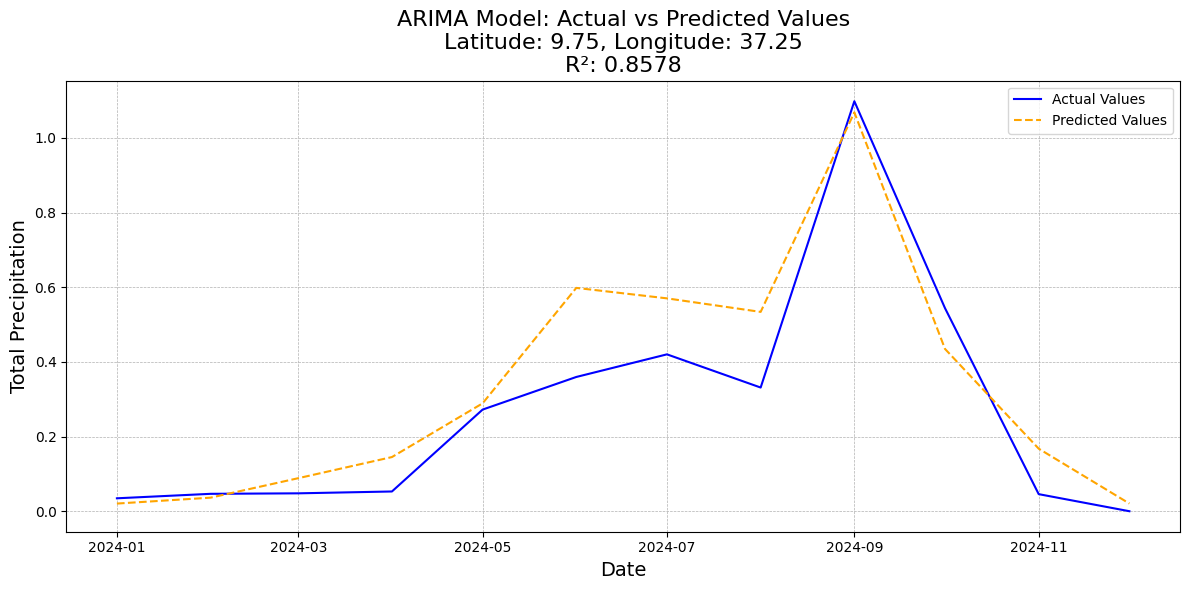

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


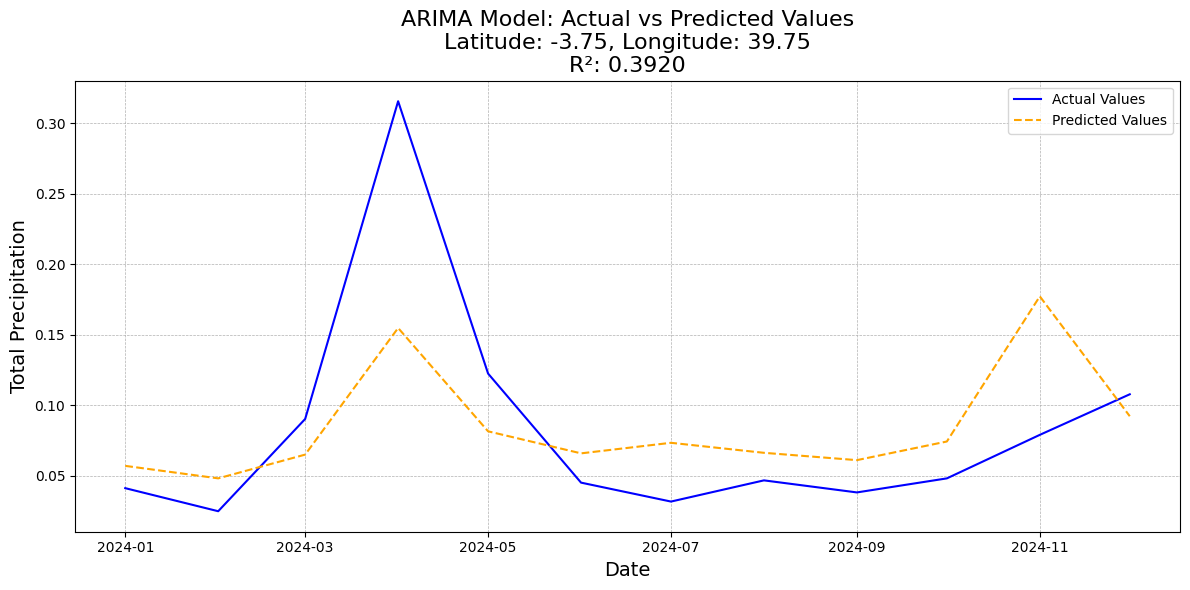

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


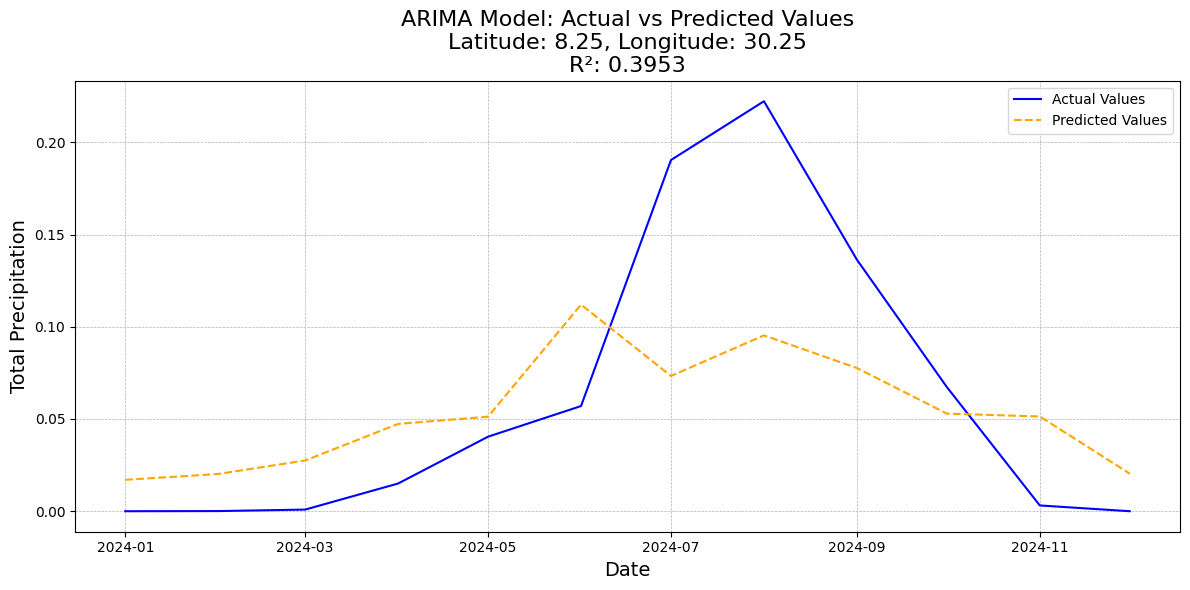

/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Skipping coordinate (3.5, 32.5) due to low R² value: -0.8143


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


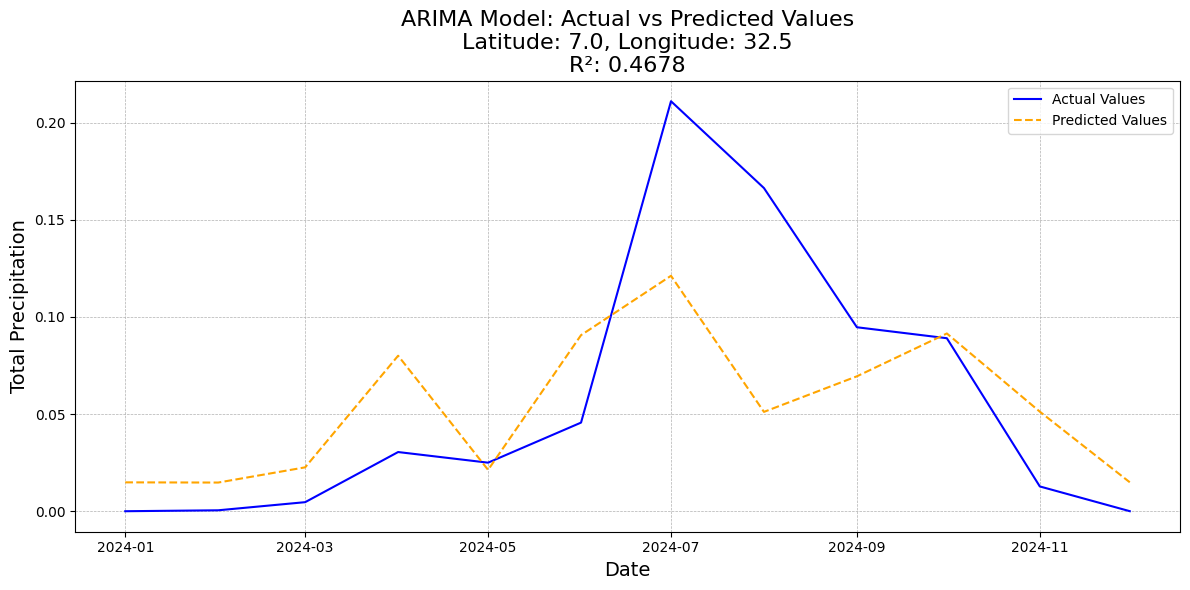

Skipping coordinate (5.25, 36.0) due to low R² value: -0.0062
The average R² value from all valid samples is: 0.5965


/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/patrickscheri/Desktop/repo/ML1c01/1.C51/ml_project/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
from sklearn.metrics import r2_score
import random

# Randomly select 20 unique coordinates
random_coordinates = random.sample(unique_coordinates, 20)

# Initialize a list to store R^2 values
r2_values = []

# Iterate over the selected coordinates
for lat, lon in random_coordinates:
    # Filter data for the current coordinate pair
    coord_data = data[(data['latitude'] == lat) & (data['longitude'] == lon)]
    
    # Ensure there is enough data for time series analysis
    if len(coord_data) < 24:  # Skip if less than 2 years of data
        print(f"Skipping coordinate ({lat}, {lon}) due to insufficient data.")
        continue
    
    # Split the data into train and test sets
    coord_train_data = coord_data[coord_data['date'] < '2024-01-01']
    coord_test_data = coord_data[coord_data['date'] >= '2024-01-01']
    
    # Prepare the time series data
    coord_train_series = coord_train_data['tp']
    coord_test_series = coord_test_data['tp']
    
    # Skip if the training series is empty
    if coord_train_series.empty:
        print(f"Skipping coordinate ({lat}, {lon}) due to empty training series.")
        continue
    
    # Fit the ARIMA model
    try:
        coord_arima_model = auto_arima(
            coord_train_series, seasonal=True, m=12, trace=False, error_action='ignore', suppress_warnings=True
        )
        
        # Predict values for the test data
        coord_test_predicted = coord_arima_model.predict(n_periods=len(coord_test_data))
        
        # Calculate R²
        r2 = r2_score(coord_test_series, coord_test_predicted)
        
        # Skip if R² is less than 0.3
        if r2 < 0.3:
            print(f"Skipping coordinate ({lat}, {lon}) due to low R² value: {r2:.4f}")
            continue
        
        # Store the R² value
        r2_values.append(r2)
        
        # Plot the actual vs predicted values
        plt.figure(figsize=(12, 6))
        plt.plot(coord_test_data['date'], coord_test_data['tp'], label='Actual Values', color='blue')
        plt.plot(coord_test_data['date'], coord_test_predicted, label='Predicted Values', color='orange', linestyle='--')
        
        # Add title and labels
        plt.title(
            f'ARIMA Model: Actual vs Predicted Values\n'
            f'Latitude: {lat}, Longitude: {lon}\n'
            f'R²: {r2:.4f}',
            fontsize=16
        )
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Total Precipitation', fontsize=14)
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Show the plot
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error processing coordinate ({lat}, {lon}): {e}")
        continue

# Calculate and print the average R² value
if r2_values:
    average_r2 = sum(r2_values) / len(r2_values)
    print(f"The average R² value from all valid samples is: {average_r2:.4f}")
else:
    print("No valid R² values were calculated.")

In [ ]:
# # Initialize an empty list to store results
# results = []

# # Iterate over each unique coordinate pair
# for lat, lon in unique_coordinates:
#     # Filter data for the current coordinate pair
#     coord_data = data[(data['latitude'] == lat) & (data['longitude'] == lon)]
    
#     # Ensure there is enough data for time series analysis
#     if len(coord_data) < 24:  # Skip if less than 2 years of data
#         continue
    
#     # Split the data into train and test sets
#     coord_train_data = coord_data[coord_data['date'] < '2024-01-01']
#     coord_test_data = coord_data[coord_data['date'] >= '2024-01-01']
    
#     # Prepare the time series data
#     coord_train_series = coord_train_data['tp']
#     coord_test_series = coord_test_data['tp']
    
#     # Skip if the training series is empty
#     if coord_train_series.empty:
#         continue
    
#     # Fit the ARIMA model
#     try:
#         coord_arima_model = auto_arima(
#             coord_train_series, seasonal=True, m=12, trace=False, error_action='ignore', suppress_warnings=True
#         )
        
#         # Extract ARIMA parameters
#         p, d, q = coord_arima_model.order
#         P, D, Q, s = coord_arima_model.seasonal_order
        
#         # Predict on the training set
#         coord_train_predicted = coord_arima_model.predict_in_sample()
#         coord_train_actual = coord_train_series.values
        
#         # Calculate MAE and RMSE for the training set
#         coord_mae_train = mean_absolute_error(coord_train_actual, coord_train_predicted)
#         coord_rmse_train = np.sqrt(mean_squared_error(coord_train_actual, coord_train_predicted))
        
#         # Store the results
#         results.append({
#             'latitude': lat,
#             'longitude': lon,
#             'p': p,
#             'd': d,
#             'q': q,
#             'P': P,
#             'D': D,
#             'Q': Q,
#             's': s,
#             'MAE': coord_mae_train,
#             'RMSE': coord_rmse_train
#         })
#     except Exception as e:
#         # Handle any errors during model fitting
#         print(f"Error processing coordinate ({lat}, {lon}): {e}")
#         continue

# # Convert results to a DataFrame
# results_df = pd.DataFrame(results)

# # Display the results
# print(results_df)

KeyboardInterrupt: 

In [ ]:
results

[{'latitude': -10.0,
  'longitude': 30.0,
  'p': 0,
  'd': 0,
  'q': 1,
  'P': 1,
  'D': 0,
  'Q': 1,
  's': 12,
  'MAE': 0.05222636132049152,
  'RMSE': 0.07488200954002744},
 {'latitude': -10.0,
  'longitude': 30.25,
  'p': 1,
  'd': 0,
  'q': 0,
  'P': 2,
  'D': 0,
  'Q': 1,
  's': 12,
  'MAE': 0.049850319044358,
  'RMSE': 0.07378225351563711},
 {'latitude': -10.0,
  'longitude': 30.5,
  'p': 2,
  'd': 0,
  'q': 2,
  'P': 0,
  'D': 0,
  'Q': 0,
  's': 12,
  'MAE': 0.056545291064039355,
  'RMSE': 0.07329664154294357},
 {'latitude': -10.0,
  'longitude': 30.75,
  'p': 2,
  'd': 0,
  'q': 3,
  'P': 1,
  'D': 0,
  'Q': 1,
  's': 12,
  'MAE': 0.04612973773048701,
  'RMSE': 0.06709887256591052},
 {'latitude': -10.0,
  'longitude': 31.0,
  'p': 2,
  'd': 0,
  'q': 2,
  'P': 0,
  'D': 0,
  'Q': 0,
  's': 12,
  'MAE': 0.058721934232388584,
  'RMSE': 0.07629904929489889},
 {'latitude': -10.0,
  'longitude': 31.25,
  'p': 2,
  'd': 0,
  'q': 0,
  'P': 1,
  'D': 0,
  'Q': 2,
  's': 12,
  'MAE': 